<a href="https://colab.research.google.com/github/chenneil69/bash-tutorial/blob/master/20241220_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [101]:
# 1. 載入資料集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [102]:
# 2. 資料預處理
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [103]:
# 3. 定義模型結構
model = Sequential()

# Create CN layer 1
model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same', input_shape=(28, 28, 1), activation='relu', name='conv2d_1'))
# Create Max-Pool 1
model.add(MaxPooling2D(pool_size=(2, 2), name='max_pooling2d_1'))

# Create CN layer 2
model.add(Conv2D(filters=36, kernel_size=(5, 5), padding='same', activation='relu', name='conv2d_2'))
# Create Max-Pool 2
model.add(MaxPooling2D(pool_size=(2, 2), name='max_pooling2d_2'))

# Add Dropout layer
model.add(Dropout(0.25, name='dropout_1'))

# Flatten the feature maps
model.add(Flatten(name='flatten'))
# Fully connected layer 1
model.add(Dense(128, activation='relu', name='dense_1'))
# Add another Dropout layer
model.add(Dropout(0.5, name='dropout_2'))
# Output layer
model.add(Dense(10, activation='softmax', name='dense_2'))
model.summary()


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 16)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 36)          │          14,436 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 36)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 36)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1764)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         225,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,062 (945.55 KB)

 Trainable params: 242,062 (945.55 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
# 4. 加入 EarlyStop 編譯模型

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
# 5. fit() 並切驗證集
history = model.fit(x_train, y_train, epochs=20, batch_size=10, validation_split=0.2)

Epoch 1/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8735 - loss: 0.3901 - val_accuracy: 0.9852 - val_loss: 0.0519
Epoch 2/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9763 - loss: 0.0847 - val_accuracy: 0.9896 - val_loss: 0.0360
Epoch 3/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9808 - loss: 0.0632 - val_accuracy: 0.9887 - val_loss: 0.0382
Epoch 4/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9835 - loss: 0.0560 - val_accuracy: 0.9907 - val_loss: 0.0357
Epoch 5/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9861 - loss: 0.0459 - val_accuracy: 0.9898 - val_loss: 0.0414
Epoch 6/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9860 - loss: 0.0468 - val_accuracy: 0.9916 - val_loss: 0.0356
Epoch 7/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9868 - loss: 0.0442 - val_accuracy: 0.9917 - val_loss: 0.0358
Epoch 8/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9889 - loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Predictions (first 5 samples):  [7 2 1 0 4]
Actual labels (first 5 samples):  [7 2 1 0 4]


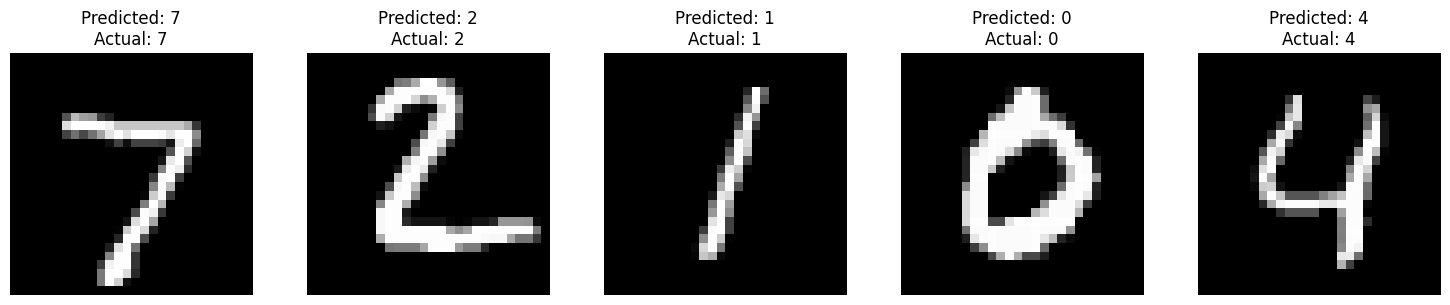

In [106]:
# 6. 預測
predictions = model.predict(x_test[:5]) # 對測試集中前5筆數據進行預測
predicted_labels = predictions.argmax(axis=1) # 預測結果
actual_labels = y_test[:5].argmax(axis=1)     # 實際標籤

# 顯示預測與實際標籤
print('Predictions (first 5 samples): ', predicted_labels)
print('Actual labels (first 5 samples): ', actual_labels)

# 視覺化預測結果
fig, axes = plt.subplots(1, 5, figsize=(15, 3)) # 建立 1x5 圖片顯示區
for i, ax in enumerate(axes):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray') # 顯示灰度圖像
    ax.set_title(f'Predicted: {predicted_labels[i]}\nActual: {actual_labels[i]}')
    ax.axis('off') # 隐藏軸線
plt.tight_layout()
plt.show()


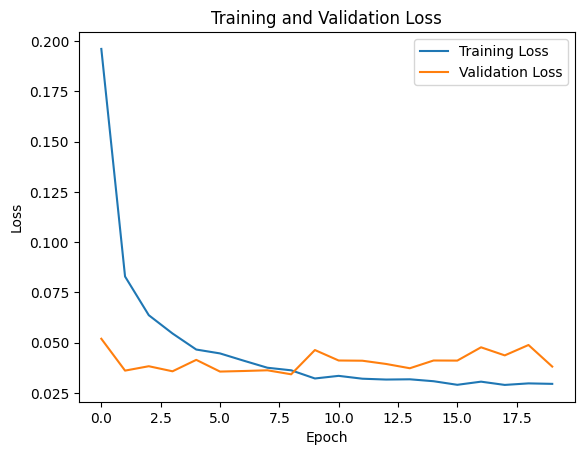

In [107]:
# 7. 訓練與驗證損失視覺化
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()